# <center>Phân cụm các chuyến xe khách dựa trê giá vé và các đánh giá</center>

---

## 1. Load data

In [404]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

In [405]:
folder_path = "../../data/processed"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Đọc file csv
lst_df = []
for file in csv_files:
    df = pd.read_csv(file)
    lst_df.append(df)

# Nối các DataFrame lại với nhau
df = pd.concat(lst_df)
df = df.reset_index(drop=True)

In [406]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28656 entries, 0 to 28655
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company_name              28656 non-null  object 
 1   departure_time            28656 non-null  object 
 2   pickup_point              28656 non-null  object 
 3   arrival_time              28656 non-null  object 
 4   dropoff_point             28656 non-null  object 
 5   price_original            28656 non-null  int64  
 6   price_discounted          28656 non-null  int64  
 7   departure_date            28656 non-null  object 
 8   start_point               28656 non-null  object 
 9   destination               28656 non-null  object 
 10  rating_safety             28656 non-null  float64
 11  rating_info_accuracy      28656 non-null  float64
 12  rating_info_completeness  28656 non-null  float64
 13  rating_staff_attitude     28656 non-null  float64
 14  rating

,price_original,price_discounted,rating_safety,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
count,2.865600e+04,28656.000000,28656.000000,28656.000000,28656.000000,28656.00000,28656.000000,28656.000000,28656.000000,28656.000000,28656.000000,28656.000000,28656.000000
mean,3.325532e+05,131668.518007,4.586160,4.451898,4.511554,4.48772,4.438264,4.404484,4.612416,4.427429,2080.662584,22.430451,369.670191
std,1.583610e+05,172442.983853,0.361528,0.469673,0.422865,0.42896,0.462517,0.476747,0.466503,0.489651,3555.655236,13.417856,250.788042
min,0.000000e+00,0.000000,2.300000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,30.000000
25%,2.200000e+05,0.000000,4.500000,4.200000,4.300000,4.30000,4.200000,4.200000,4.600000,4.200000,111.000000,11.000000,150.000000
50%,3.000000e+05,0.000000,4.700000,4.600000,4.600000,4.60000,4.600000,4.500000,4.700000,4.600000,486.000000,24.000000,330.000000
75%,4.050000e+05,270000.000000,4.800000,4.800000,4.800000,4.80000,4.700000,4.700000,4.800000,4.800000,2367.000000,34.000000,515.000000
max,1.200000e+06,900000.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,17457.000000,242.000000,1500.000000


In [407]:
print(f"DataFrame shape: {df.shape}")
df.sample(10)

DataFrame shape: (28656, 21)


,company_name,departure_time,pickup_point,arrival_time,dropoff_point,price_original,price_discounted,departure_date,start_point,destination,...,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
14439,Tân Minh Hà,11:30:00,Bến xe,17:30,Other,350000,0,2025-11-18,Hà Nội,Nghệ An,...,4.3,4.2,4.6,4.0,4.3,4.7,4.3,26,22,360
17509,Trường Phát,08:00:00,Văn phòng,11:00,Văn phòng,300000,270000,2025-11-19,Đà Nẵng,Quảng Ngãi,...,5.0,5.0,5.0,5.0,5.0,4.7,4.8,81,7,180
9967,Vương Tấn Dũng,17:00:00,Bến xe,06:40,Bến xe,500000,425000,2025-11-17,Sài Gòn,Gia Lai,...,4.8,4.8,4.8,4.8,4.8,4.9,4.8,386,24,820
10249,Liên Hưng,08:45:00,Văn phòng,17:00,Văn phòng,330000,230000,2025-11-17,Sài Gòn,Ninh Thuận,...,4.2,4.3,4.1,4.0,3.9,4.3,4.0,13084,32,495
6944,Phi Long,11:40:00,Other,05:25,Bến xe,550000,495000,2025-11-15,Đà Nẵng,Sài Gòn,...,4.9,4.9,5.0,4.7,4.8,4.7,4.9,3,40,1065
6246,Tân Quang Dũng,00:05:00,Văn phòng,07:30,Văn phòng,350000,0,2025-11-15,Sài Gòn,Đà Lạt - Lâm Đồng,...,3.9,4.0,4.0,3.9,3.8,4.3,3.8,2382,22,445
26608,Tuấn Tú Express,21:01:00,Văn phòng,06:21,Other,700000,399900,2025-11-23,Sài Gòn,Phú Yên,...,4.6,4.6,4.6,4.5,4.5,4.6,4.5,1440,24,560
9083,FUTA HÀ SƠN,23:40:00,Bến xe,04:10,Bến xe,390000,0,2025-11-16,Hà Nội,Nghệ An,...,4.8,4.8,4.8,4.8,4.8,4.8,4.8,370,24,270
13623,LH Minh Trí Limousine,04:00:00,Văn phòng,11:50,Văn phòng,350000,0,2025-11-18,Sài Gòn,Đà Lạt - Lâm Đồng,...,4.3,4.4,4.4,4.4,4.3,4.5,4.4,1746,9,470
27763,Hải Phòng Travel,19:02:00,Other,20:32,Other,230000,0,2025-11-23,Hà Nội,Hải Phòng,...,4.3,4.3,4.4,4.4,4.3,4.4,4.4,1263,11,90


In [408]:
df.to_csv('concat_data.csv', index=False)

In [409]:
s

NameError: name 's' is not defined

---

## 2. Feature Engineering

### Create new feature

In [ ]:
def basic_feature_engineering(df):
    """Tạo các features cơ bản"""
    df = df.copy()
    
    # 2.1. Xử lý giá discounted = 0
    df.loc[df['price_discounted'] == 0, 'price_discounted'] = df['price_original']
    
    # 2.2. Tạo features về giá
    df['discount_rate'] = (df['price_original'] - df['price_discounted']) / df['price_original'].replace(0, np.nan)
    df['discount_rate'] = df['discount_rate'].fillna(0)
    df['price_per_minute'] = df['price_discounted'] / df['duration_minutes'].replace(0, np.nan)
    df['price_per_minute'] = df['price_per_minute'].fillna(0)
    
    # 2.3. Tạo features về rating
    quality_cols = ['rating_comfort', 'rating_service_quality', 'rating_staff_attitude']
    info_cols = ['rating_info_accuracy', 'rating_info_completeness']
    
    df['rating_quality'] = df[quality_cols].mean(axis=1)
    df['rating_info'] = df[info_cols].mean(axis=1)
    df['value_index'] = df['rating_overall'] / df['price_discounted'].replace(0, np.nan)
    df['value_index'] = df['value_index'].fillna(0)
    
    # 2.4. Xử lý thời gian
    df = add_time_hour(df, 'departure_time', 'departure_time_hour')
    df = add_time_hour(df, 'arrival_time', 'arrival_time_hour')
    
    return df

def add_time_hour(df, time_col, new_col):
    """Convert time to hour"""
    time_split = df[time_col].str.split(":", expand=True).astype("Int64")
    condition = time_split[1] > 30
    time_split.loc[condition, 0] += 1
    time_split[0] = time_split[0].replace(24, 0)
    df[new_col] = time_split[0].astype("int64")
    return df


In [ ]:
def advanced_feature_engineering(df):
    """Tạo các features nâng cao"""
    df = df.copy()
    
    # 3.1. Interaction features (Tương tác giữa các biến)
    df['price_quality_ratio'] = df['price_discounted'] / (df['rating_quality'] + 0.0001)
    df['price_rating_interaction'] = df['price_discounted'] * df['rating_overall']
    df['discount_rating_interaction'] = df['discount_rate'] * df['rating_overall']
    df['reviewer_rating_interaction'] = df['reviewer_count'] * df['rating_overall']
    df['reviewer_weight'] = np.log1p(df['reviewer_count']) * df['rating_overall']
    
    # 3.2. Time-based features
    df['time_of_day'] = pd.cut(df['departure_time_hour'], 
                                bins=[0, 6, 12, 18, 24],
                                labels=['night', 'morning', 'afternoon', 'evening'])
    df['time_of_day_encoded'] = df['time_of_day'].cat.codes
    df['price_per_hour'] = df['price_discounted'] / (df['duration_minutes'] / 60 + 0.0001)
    
    # 3.3. Rating analysis features
    rating_cols = ['rating_safety', 'rating_info', 'rating_quality', 
                   'rating_punctuality', 'rating_overall']
    df['rating_std'] = df[rating_cols].std(axis=1)
    df['rating_gap'] = df[rating_cols].max(axis=1) - df[rating_cols].min(axis=1)
    df['rating_consistency'] = 1 / (df['rating_std'] + 0.0001)
    df['weighted_rating'] = (df['rating_overall'] * np.log1p(df['reviewer_count'])) / \
                           (np.log1p(df['reviewer_count']) + 1)
    
    # 3.4. Categorical features
    df['price_category'] = pd.cut(df['price_discounted'],
                                   bins=[0, 200000, 300000, 400000, np.inf],
                                   labels=['budget', 'economy', 'standard', 'premium'])
    df['price_category_encoded'] = df['price_category'].cat.codes
    
    df['rating_category'] = pd.cut(df['rating_overall'],
                                    bins=[0, 3.5, 4.0, 4.5, 5.0],
                                    labels=['low', 'medium', 'high', 'excellent'])
    df['rating_category_encoded'] = df['rating_category'].cat.codes
    
    # 3.5. Comparison features (so sánh với trung bình)
    df['price_vs_route_avg'] = df.groupby(['start_point', 'destination'])['price_discounted'].transform(
        lambda x: (x - x.mean()) / (x.std() + 0.0001)
    )
    df['rating_vs_company_avg'] = df.groupby('company_name')['rating_overall'].transform(
        lambda x: (x - x.mean()) / (x.std() + 0.0001)
    )
    
    return df

In [ ]:
# Áp dụng
df = basic_feature_engineering(df)
df = advanced_feature_engineering(df)

---

### Handle Outliers and Skewness

#### Handle Outliers

In [ ]:
def handle_outliers_auto(df):
    df_out = df.copy()
    numeric_cols = df_out.select_dtypes(include=['float64','int64']).columns
    
    for col in numeric_cols:
        skew = df_out[col].skew()

        # 1) rating-scale: skip
        if df_out[col].min() >= 1 and df_out[col].max() <= 5:
            continue
        
        # 2) categorical encoded: skip
        if df_out[col].nunique() < 20 and df_out[col].dtype in ['int64']:
            continue

        # 3) Strong skew: log + clip
        if skew > 1.5:
            df_out[col] = df_out[col].clip(
                df_out[col].quantile(0.02),
                df_out[col].quantile(0.98)
            )
            df_out[col] = np.log1p(df_out[col])

        # 4) Medium skew: sqrt
        elif skew > 0.5:
            df_out[col] = np.sqrt(df_out[col].clip(lower=0))

        # 5) Otherwise: do nothing
        else:
            continue

    return df_out

df = handle_outliers_auto(df)

---

In [ ]:
corr = df[df.select_dtypes(include=['float64','int64']).columns].corr().abs()

upper_tri = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)

high_corr_features = [
    col for col in upper_tri.columns if any(upper_tri[col] > 0.8)
]

print("High corr:", high_corr_features)


High corr: ['price_discounted', 'rating_info_accuracy', 'rating_info_completeness', 'rating_staff_attitude', 'rating_comfort', 'rating_service_quality', 'rating_overall', 'rating_quality', 'rating_info', 'price_quality_ratio', 'price_rating_interaction', 'discount_rating_interaction', 'reviewer_rating_interaction', 'reviewer_weight', 'price_per_hour', 'rating_gap', 'rating_consistency', 'weighted_rating']


In [ ]:
feature_num = df.drop(columns=high_corr_features)

In [ ]:
feature_num = feature_num.select_dtypes(include=['float64', 'int64']).columns.to_list()

In [ ]:
df = df[
    ['price_original',   
    'rating_safety',
    'rating_punctuality',
    'price_per_minute',
    'price_vs_route_avg',
    'rating_vs_company_avg',
    'price_category', 'rating_category', 'start_point', 'destination', 'price_discounted']
]
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,price_original,rating_safety,rating_punctuality,price_per_minute,price_vs_route_avg,rating_vs_company_avg,price_category,rating_category,start_point,destination,price_discounted
0,591.607978,4.8,4.9,6.121496,0.000000,0.000000,economy,excellent,Sài Gòn,Gia Lai,547.722558
1,608.276253,4.7,4.9,6.131041,0.000000,0.540322,economy,excellent,Sài Gòn,Gia Lai,544.058820
2,728.010989,4.5,4.7,6.340284,0.658008,0.732510,standard,high,Sài Gòn,Gia Lai,631.664468
3,591.607978,4.7,4.5,6.275333,0.000000,0.000000,standard,excellent,Sài Gòn,Gia Lai,591.607978
4,591.607978,4.6,4.9,6.175867,0.000000,0.000000,economy,excellent,Sài Gòn,Gia Lai,547.722558


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


def scaler_feature(df, feature_num, feature_cat):

    df = df.copy()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', RobustScaler(), feature_num),
            ('cat', OneHotEncoder(), feature_cat)
        ]
    )
    X_scaled = preprocessor.fit_transform(df)

    return X_scaled

In [ ]:
feature_num = [
    'price_original',
    'price_discounted', 
    'rating_safety',
    'rating_punctuality',
    'price_per_minute',
    'price_vs_route_avg',
    'rating_vs_company_avg'
    ]
feature_cat = ['price_category', 'rating_category', 'start_point', 'destination']

# 1. Fill missing
df[feature_num] = df[feature_num].fillna(
    df[feature_num].median()
)

# 2. Scale
X_scaled = scaler_feature(df, feature_num, feature_cat)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 3. KMeans
model = KMeans(n_clusters=3, random_state=42)
labels = model.fit_predict(X_scaled)
print(silhouette_score(X_scaled, labels))

0.942416890353315


In [ ]:
def train_kmeans_model(X_scaled, min_k=2, max_k=10):
    
    result = []
    for k in range(min_k, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        result.append((k, score))
        print(f"K={k}, Silhouette Score={score:.4f}")

train_kmeans_model(X_scaled)

K=2, Silhouette Score=0.9383
K=3, Silhouette Score=0.9424
K=4, Silhouette Score=0.9502
K=5, Silhouette Score=0.9485
K=6, Silhouette Score=0.9511
K=7, Silhouette Score=0.9445
K=8, Silhouette Score=0.9427
K=9, Silhouette Score=0.9498
K=10, Silhouette Score=0.9470


In [ ]:
# from sklearn.metrics import silhouette_score

# scores = []
# for k in range(2, 5):
#     labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
#     scores.append(silhouette_score(X_scaled, labels))

# plt.plot(range(2,5), scores)

In [ ]:
# from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer


# processsor = ColumnTransformer(
#     transformers=[
#         ('num', RobustScaler(), final_cluster_features_num),
#         ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), final_cluster_features_cat)
#     ]
# )
# X_scaled = processsor.fit_transform(df_clean)

PCA variance explained: 1.0000


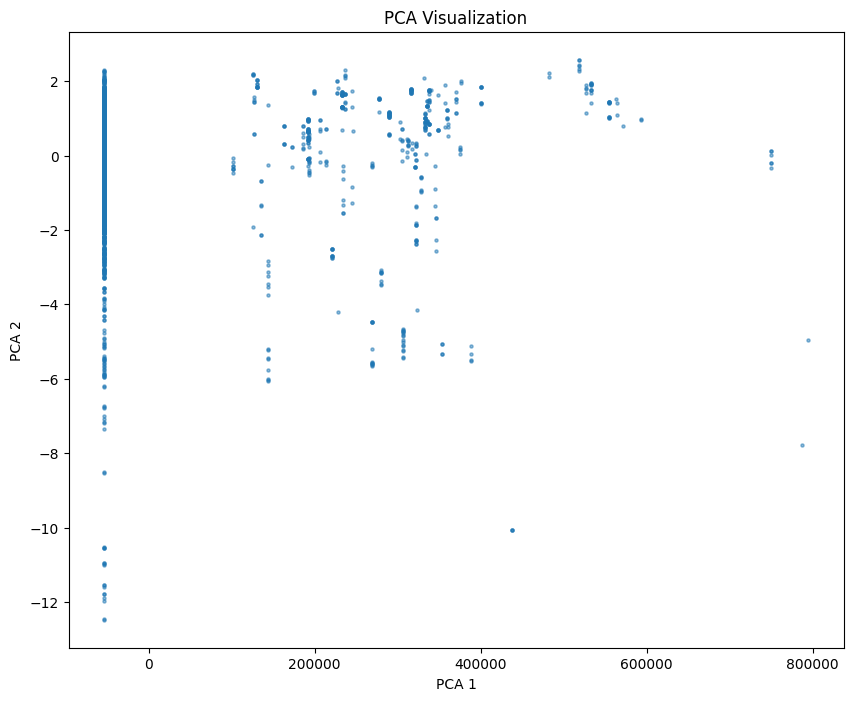

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def dimensionality_reduction(X_scaled, method='pca', n_components=2):
    """Giảm chiều dữ liệu"""
    
    if method == 'pca':
        reducer = PCA(n_components=n_components, random_state=42)
        X_reduced = reducer.fit_transform(X_scaled)
        variance_explained = reducer.explained_variance_ratio_.sum()
        print(f"PCA variance explained: {variance_explained:.4f}")
    
    elif method == 'tsne':
        reducer = TSNE(n_components=n_components, random_state=42, perplexity=30)
        X_reduced = reducer.fit_transform(X_scaled)
        print("t-SNE completed")
    
    # Visualize
    plt.figure(figsize=(10, 8))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=5, alpha=0.5)
    plt.xlabel(f'{method.upper()} 1')
    plt.ylabel(f'{method.upper()} 2')
    plt.title(f'{method.upper()} Visualization')
    plt.show()
    
    return X_reduced, reducer

# Thử cả PCA và t-SNE
X_pca, pca_reducer = dimensionality_reduction(X_scaled, method='pca')
# X_tsne, tsne_reducer = dimensionality_reduction(X_scaled, method='tsne')

✅ Dữ liệu đầu vào là Sparse Matrix, đã chuyển đổi sang Dense Array cho việc tính toán chỉ số.
k=2: Silhouette=0.9383, DB=0.2539, CH=22576.42, Inertia=7369405769710.34
k=3: Silhouette=0.9424, DB=0.3436, CH=30323.09, Inertia=2976553658185.57
k=4: Silhouette=0.9502, DB=0.3312, CH=65123.18, Inertia=957076941641.81
k=5: Silhouette=0.9485, DB=0.3309, CH=66399.54, Inertia=706834053461.21
k=6: Silhouette=0.9511, DB=0.2788, CH=101998.77, Inertia=370127118441.47
k=7: Silhouette=0.9445, DB=0.3267, CH=124696.96, Inertia=252723282521.32
k=8: Silhouette=0.9427, DB=0.3465, CH=176717.46, Inertia=153065841125.82
k=9: Silhouette=0.9498, DB=0.3065, CH=245778.97, Inertia=96362000649.09
k=10: Silhouette=0.9470, DB=0.3493, CH=278382.39, Inertia=75626641131.43


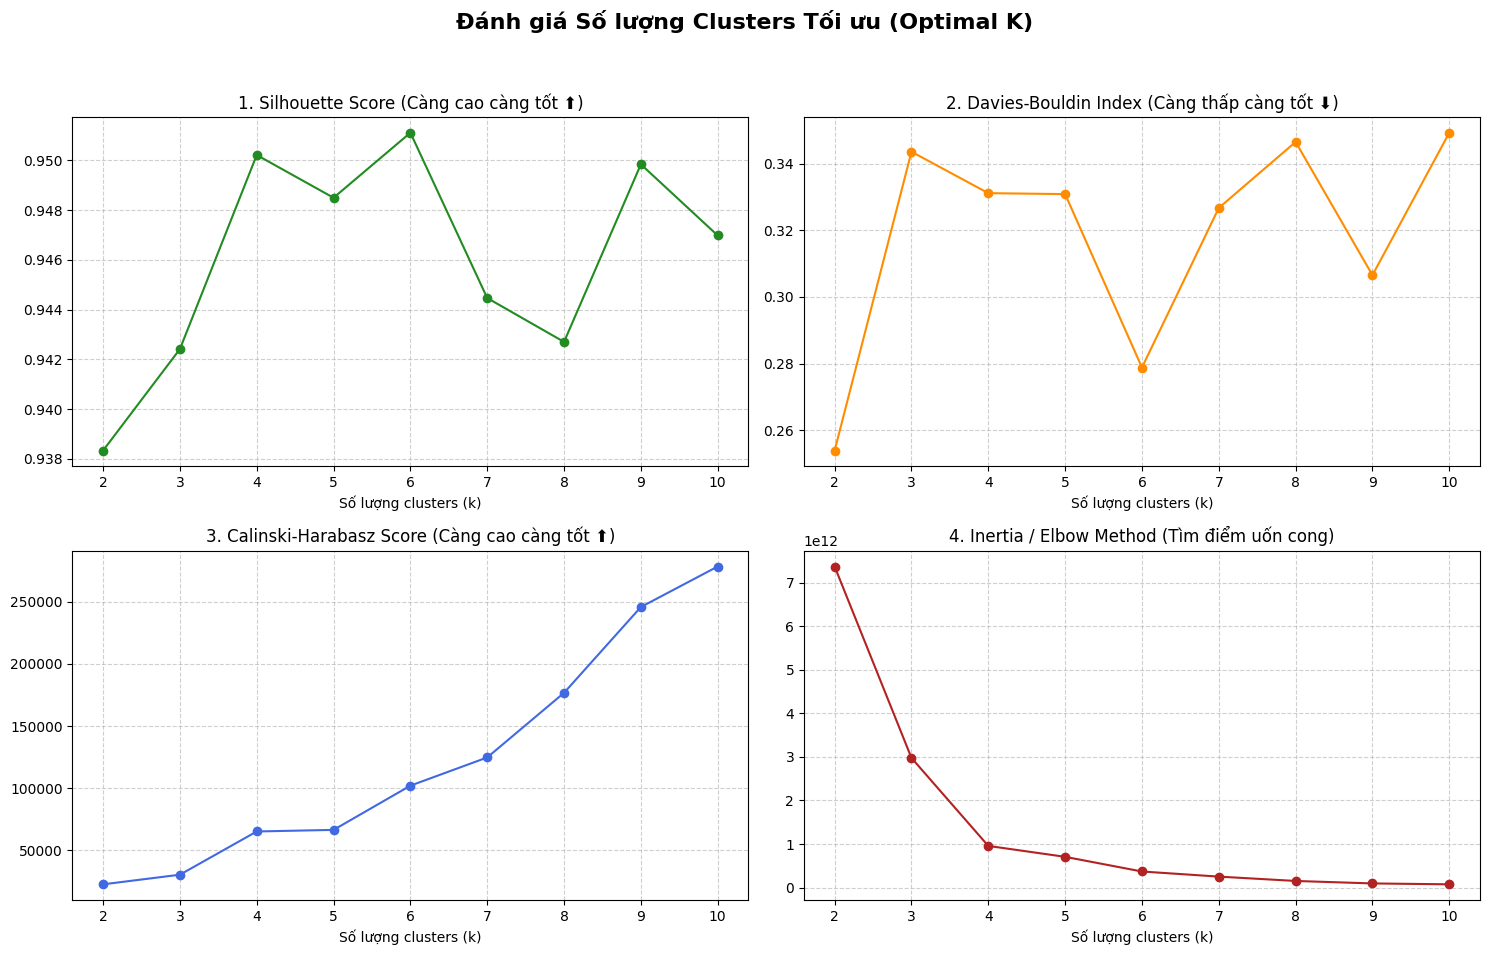

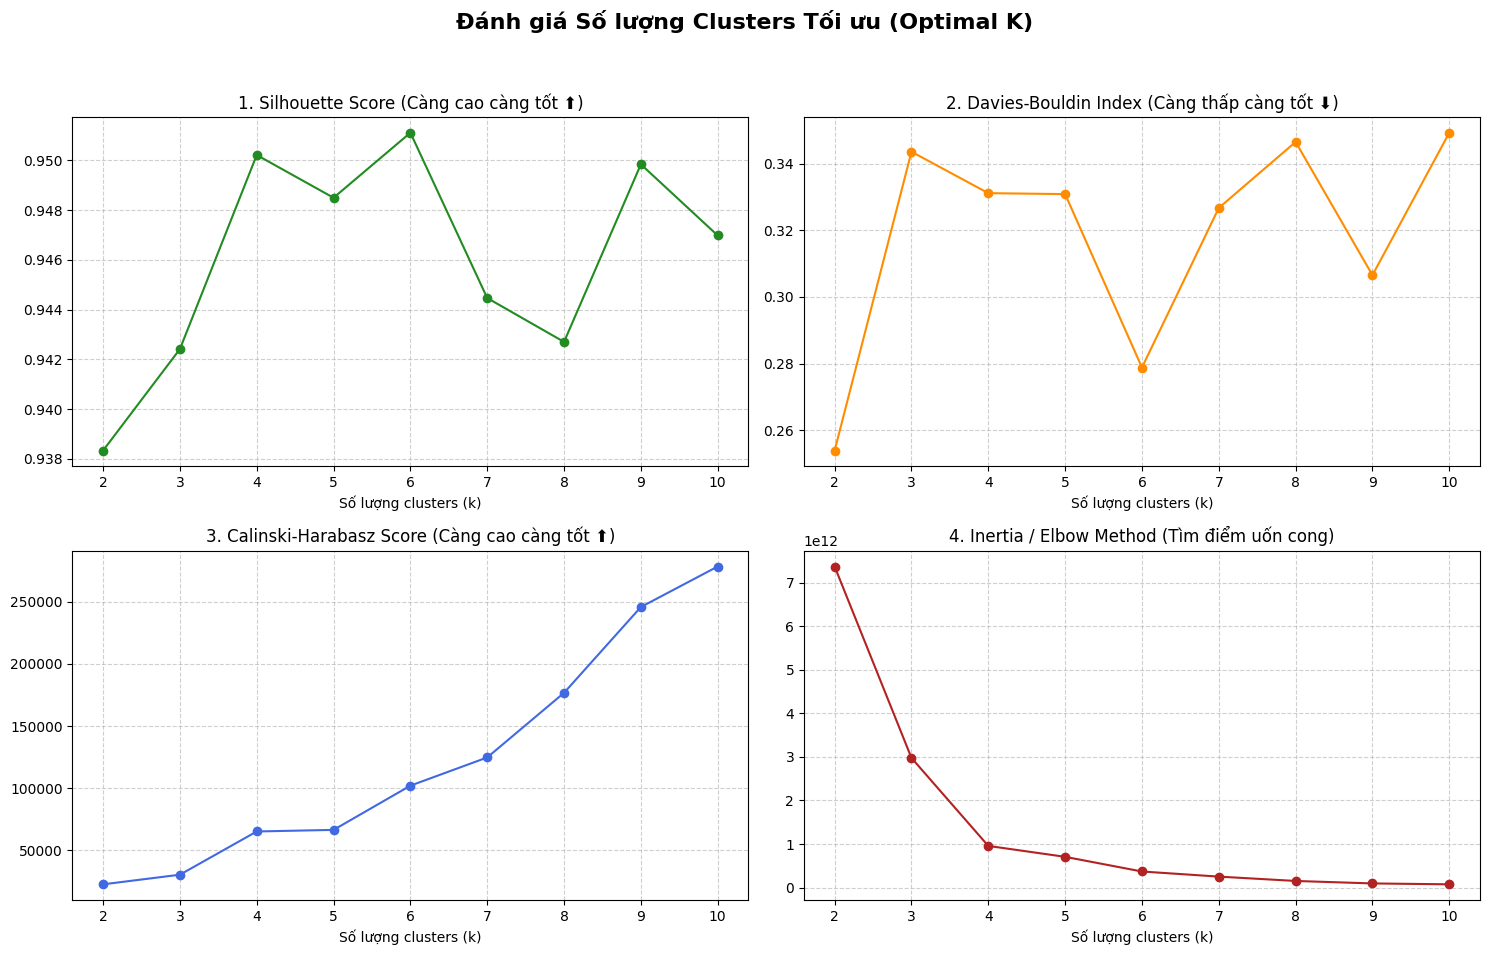

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Giả định X_scaled đã được định nghĩa ở đâu đó trong môi trường của bạn (có thể là Sparse Matrix)

def find_optimal_clusters(X_scaled, max_k=10):
    """
    Tìm số clusters tối ưu (k) cho thuật toán K-Means dựa trên nhiều chỉ số đánh giá.
    
    Args:
        X_scaled (array-like, Sparse or Dense): Dữ liệu đầu vào đã được chuẩn hóa.
        max_k (int): Số lượng cụm tối đa để kiểm tra.
        
    Returns:
        pd.DataFrame: Bảng kết quả các chỉ số đánh giá cho mỗi k.
    """
    
    # 💡 Xử lý Dữ liệu Thưa (Sparse Matrix) 
    # Một số chỉ số (như Davies-Bouldin, Calinski-Harabasz) yêu cầu ma trận Dense.
    if hasattr(X_scaled, 'toarray'):
        X_dense = X_scaled.toarray()
        print("✅ Dữ liệu đầu vào là Sparse Matrix, đã chuyển đổi sang Dense Array cho việc tính toán chỉ số.")
    else:
        X_dense = X_scaled # Giữ nguyên nếu nó đã là Dense
        print("✅ Dữ liệu đầu vào là Dense Array, tiến hành tính toán.")

    results = []
    
    # Kiểm tra k tối thiểu
    if max_k < 2:
        print("❌ Cảnh báo: max_k phải lớn hơn hoặc bằng 2 để tính các chỉ số.")
        return pd.DataFrame()

    for k in range(2, max_k + 1):
        # 1. KMeans
        # Luôn fit K-Means trên X_scaled (Sparse hoặc Dense) để tận dụng hiệu suất nếu là Sparse
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Dùng 'auto' thay vì 10
        labels = kmeans.fit_predict(X_scaled)
        
        # 2. Metrics
        # Dùng X_dense cho các chỉ số để tránh lỗi InvalidParameterError và đảm bảo tính toán chính xác
        
        # Silhouette: Càng cao càng tốt.
        silhouette = silhouette_score(X_dense, labels)
        
        # Davies-Bouldin: Càng thấp càng tốt.
        davies_bouldin = davies_bouldin_score(X_dense, labels)
        
        # Calinski-Harabasz: Càng cao càng tốt.
        calinski_harabasz = calinski_harabasz_score(X_dense, labels)
        
        # Inertia: Càng thấp càng tốt (dùng cho Elbow Method).
        inertia = kmeans.inertia_
        
        results.append({
            'k': k,
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin,
            'calinski_harabasz': calinski_harabasz,
            'inertia': inertia
        })
        
        print(f"k={k}: Silhouette={silhouette:.4f}, DB={davies_bouldin:.4f}, CH={calinski_harabasz:.2f}, Inertia={inertia:.2f}")
    
    results_df = pd.DataFrame(results)
    
    # 3. Trực quan hóa
    visualize_clustering_metrics(results_df)
    
    return results_df

def visualize_clustering_metrics(results_df):
    """Trực quan hóa các chỉ số đánh giá cụm."""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Đánh giá Số lượng Clusters Tối ưu (Optimal K)', fontsize=16, fontweight='bold')
    
    # Silhouette Score
    axes[0,0].plot(results_df['k'], results_df['silhouette'], marker='o', color='forestgreen')
    axes[0,0].set_title('1. Silhouette Score (Càng cao càng tốt ⬆️)')
    axes[0,0].set_xlabel('Số lượng clusters (k)')
    axes[0,0].grid(True, linestyle='--', alpha=0.6)
    
    # Davies-Bouldin Index
    axes[0,1].plot(results_df['k'], results_df['davies_bouldin'], marker='o', color='darkorange')
    axes[0,1].set_title('2. Davies-Bouldin Index (Càng thấp càng tốt ⬇️)')
    axes[0,1].set_xlabel('Số lượng clusters (k)')
    axes[0,1].grid(True, linestyle='--', alpha=0.6)
    
    # Calinski-Harabasz Score
    axes[1,0].plot(results_df['k'], results_df['calinski_harabasz'], marker='o', color='royalblue')
    axes[1,0].set_title('3. Calinski-Harabasz Score (Càng cao càng tốt ⬆️)')
    axes[1,0].set_xlabel('Số lượng clusters (k)')
    axes[1,0].grid(True, linestyle='--', alpha=0.6)
    
    # Inertia (Elbow Method)
    axes[1,1].plot(results_df['k'], results_df['inertia'], marker='o', color='firebrick')
    axes[1,1].set_title('4. Inertia / Elbow Method (Tìm điểm uốn cong)')
    axes[1,1].set_xlabel('Số lượng clusters (k)')
    axes[1,1].grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Giả định chạy code (Bạn cần đảm bảo X_scaled đã được định nghĩa) ---
# Ví dụ: Giả sử X_scaled là một mảng NumPy/Pandas DataFrame/Sparse Matrix
# ❌ LƯU Ý: Đoạn này chỉ là placeholder. Bạn cần dùng X_scaled thực tế của mình.
# try:
#     # Tìm optimal k
#     results_df = find_optimal_clusters(X_scaled, max_k=10)

#     # Chọn k tốt nhất
#     best_k_silhouette = results_df.loc[results_df['silhouette'].idxmax(), 'k']
#     best_k_db = results_df.loc[results_df['davies_bouldin'].idxmin(), 'k']
#     best_k_ch = results_df.loc[results_df['calinski_harabasz'].idxmax(), 'k']
    
#     print("\n--- TÓM TẮT KẾT QUẢ ---")
#     print(f"🥇 Best k by Silhouette (Max): {best_k_silhouette}")
#     print(f"🥈 Best k by Davies-Bouldin (Min): {best_k_db}")
#     print(f"🥉 Best k by Calinski-Harabasz (Max): {best_k_ch}")
    
# except NameError:
#     print("\n⚠️ Lỗi: Biến X_scaled chưa được định nghĩa. Vui lòng chạy các bước tiền xử lý dữ liệu trước.")
#     pass # Bỏ qua nếu X_scaled chưa tồn tại

# --- Kết thúc giả định chạy code ---
result = find_optimal_clusters(X_scaled)

visualize_clustering_metrics(result)